# Webinar 3. Data visualization and analysis.

**Lesson plan**

* [EDA](#eda)
* [Data Upload](#load)
* [Decrease the amount of memory that takes up the dataset](#reduce)
* [1. Distribution of the target variable](#target)
* [2. Features Analysis](#features)
    * [2.1 Quantitative features](#num_features)
    * [2.2 Categorical features](#cat_features)
    * [2.3 Binary features](#binary_features)
    * [2.4 Correlation Matrix](#corr)
* [3. Analysis of correlation target from features](#target_features)
    * [3.1 Quantitative features](#num_features_target)
    * [3.2 Categorical / binary features](#cat_bin_features)
    * [3.3 Geodata](#geo)

**EDA** - Exploratory Data Analysis<a class='anchor' id='eda'>

_Kaggle House Prices: Advanced Regression Techniques competition:_

- Short EDA [beginner's tutorial](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
- Extended EDA [master's tutorial](https://www.kaggle.com/pavansanagapati/a-simple-tutorial-on-exploratory-data-analysis) 

**What's this for?**
- Understanding how the data is organized
- Adequacy check of the feathers
- New feature generation_ - the largest contribution to the forecast quality

**3 EDA steps in Data Science**
1. Targeting distribution
2. Fich distribution
3. Graphs of the influence of ticks on targeting

**Connecting libraries and scripts**

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
matplotlib.rcParams.update({'font.size': 14})

**Pathways to directories and files**

In [3]:
DATASET_PATH = 'housing.csv'
PREPARED_DATASET_PATH = 'housing_prepared.csv'
CALIFORNIA_MAP_PATH = 'California_Map.png'

### Data Upload

**Dataset Description**

* **longitude**
* **latitude**
* **housing_median_age**
* **total_rooms**
* **total_bedrooms**
* **population**
* **households**
* **ocean_proximity**
* **median_income**
* **median_house_value**

In [5]:
df = pd.read_csv(DATASET_PATH, sep = ';')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,14.659091,0.365909,0,0,0,1,0,2083.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,15.579659,0.338217,0,0,0,1,0,2083.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,12.951602,0.338105,0,0,0,1,0,2083.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,18.445840,0.437991,0,0,0,1,0,2083.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,17.209588,0.347265,0,0,0,1,0,2083.0


### Decrease the amount of memory that takes up the dataset<a class='anchor' id='reduce'>

Source: https://www.kaggle.com/gemartin/load-data-reduce-memory-usage

- **int8** is integer numbers in the range from -128 to 127 (1 byte size)
- **int16** is integer numbers in the range from -32768 to 32767 (2 bytes size)
- **int32** is integer numbers in the range from -2147483648 to 2147483647 (4 bytes size)
- **int64** is integer numbers in the range from -9223372036854775808 to 9223372036854775807 (8 bytes syze)

In [6]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [7]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 2.83 MB
Memory usage after optimization is: 1.06 MB
Decreased by 62.5%


In [8]:
df.dtypes

longitude               float32
latitude                float32
housing_median_age      float32
total_rooms             float32
total_bedrooms          float32
population              float32
households              float32
median_income           float32
median_house_value      float32
ocean_proximity        category
bedroom_share           float32
population_per_room     float32
<1H OCEAN                  int8
INLAND                     int8
ISLAND                     int8
NEAR BAY                   int8
NEAR OCEAN                 int8
median_rooms            float32
dtype: object

# 1. Distribution of the target variable<a class='anchor' id='target'>

- Remember the arithmetic mean difference, medians, fashion
- Arithmetic mean (expectation mat) is suitable for normal distributions = SUM / N
- Median (quantile 50%) - for almost any distribution = Midpoint of the ordered series
- Moda - for category variables = most frequently encountered value in the sample

[1, 2, 2, 3, 4, 6, 8]
3.71428571429 2


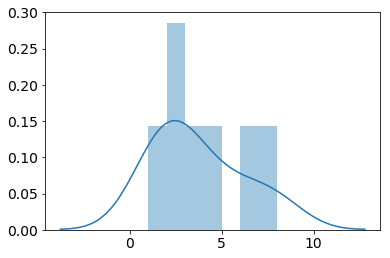

In [9]:
x = np.array([1, 4, 2, 6, 3, 8, 2])
print(sorted(x))
print(np.mean(x), stats.mode(x)[0][0])
sns.distplot(x, bins = len(x));

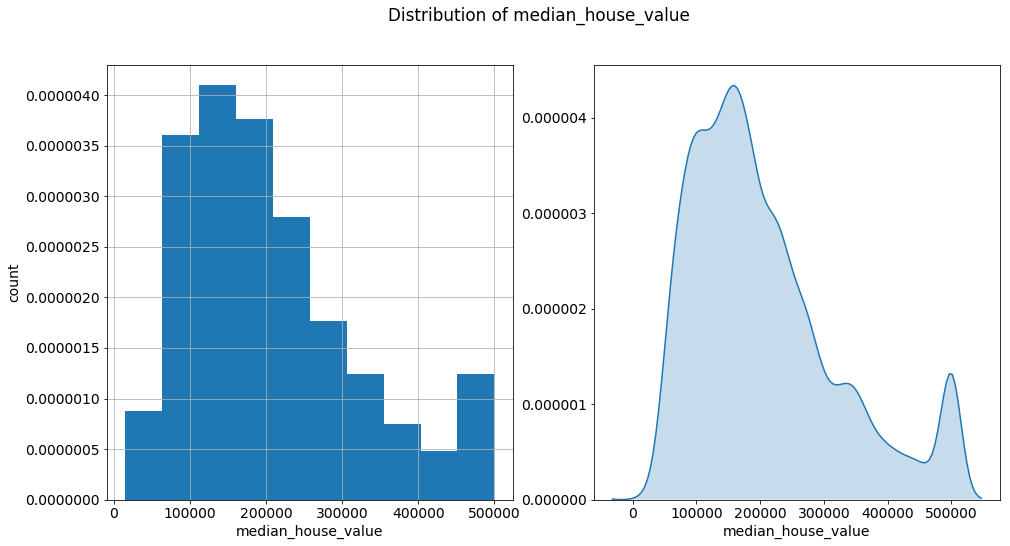

In [10]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['median_house_value'].hist(density = True)
plt.ylabel('count')
plt.xlabel('median_house_value')

plt.subplot(122)
sns.kdeplot(df['median_house_value'], shade = True, legend = False)
plt.xlabel('median_house_value')

plt.suptitle('Distribution of median_house_value')
plt.show()

In [11]:
target_mean = round(df['median_house_value'].mean(), 2)
target_median = df['median_house_value'].median()
target_mode = df['median_house_value'].mode()[0]

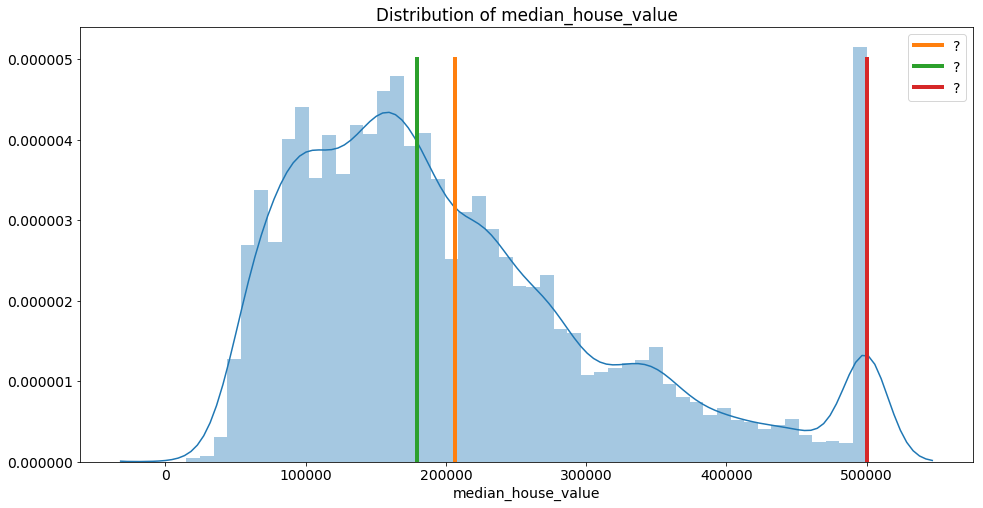

In [12]:
plt.figure(figsize = (16, 8))

sns.distplot(df['median_house_value'], bins = 50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label = '?',  linewidth = 4)
plt.plot([target_median] * 10, y, label = '?',  linewidth = 4)
plt.plot([target_mode] * 10, y, label = '?', linewidth = 4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

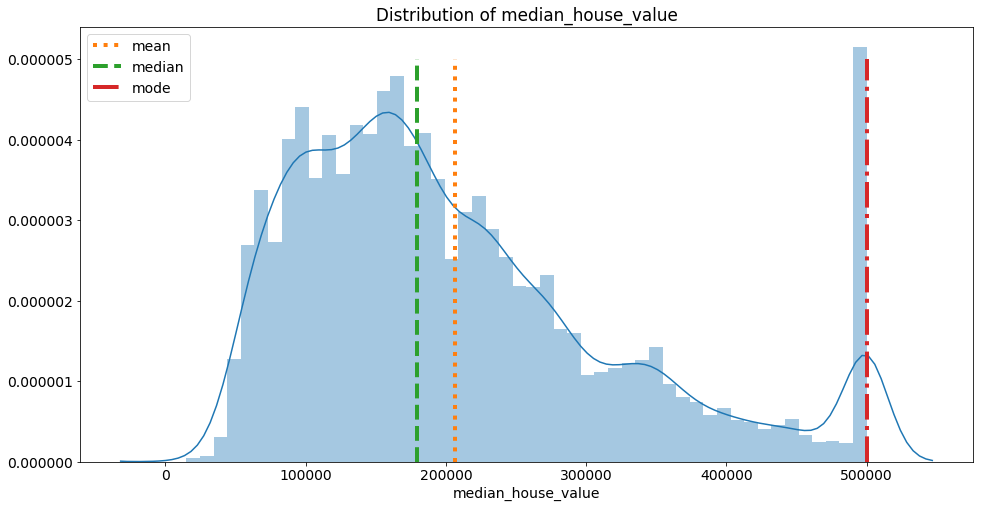

In [13]:
plt.figure(figsize = (16, 8))

sns.distplot(df['median_house_value'], bins = 50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label = 'mean', linestyle = ':', linewidth = 4)
plt.plot([target_median] * 10, y, label = 'median', linestyle = '--', linewidth = 4)
plt.plot([target_mode] * 10, y, label = 'mode', linestyle = '-.', linewidth = 4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

In [14]:
target_bins = df['median_house_value'] // 10000 * 10000
# 0 - 10000 --> 0
# 10001 - 20000 --> 1
# ...

target_adjusted_mode = target_bins.mode()[0]

target_adjusted_mode

160000.0

In [15]:
df['median_house_value']

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635    450000.0
20636    414700.0
20637    300000.0
20638    450000.0
20639    287500.0
Name: median_house_value, Length: 20640, dtype: float32

In [16]:
target_bins

0        450000.0
1        350000.0
2        350000.0
3        340000.0
4        340000.0
           ...   
20635    450000.0
20636    410000.0
20637    300000.0
20638    450000.0
20639    280000.0
Name: median_house_value, Length: 20640, dtype: float32

In [17]:
target_bins.value_counts().iloc[:10]

160000.0    1005
500000.0     992
150000.0     970
90000.0      920
180000.0     853
130000.0     850
110000.0     847
170000.0     807
140000.0     802
80000.0      768
Name: median_house_value, dtype: int64

In [18]:
len(np.unique(target_bins))

50

In [19]:
np.unique(target_bins)

array([  10000.,   20000.,   30000.,   40000.,   50000.,   60000.,
         70000.,   80000.,   90000.,  100000.,  110000.,  120000.,
        130000.,  140000.,  150000.,  160000.,  170000.,  180000.,
        190000.,  200000.,  210000.,  220000.,  230000.,  240000.,
        250000.,  260000.,  270000.,  280000.,  290000.,  300000.,
        310000.,  320000.,  330000.,  340000.,  350000.,  360000.,
        370000.,  380000.,  390000.,  400000.,  410000.,  420000.,
        430000.,  440000.,  450000.,  460000.,  470000.,  480000.,
        490000.,  500000.], dtype=float32)

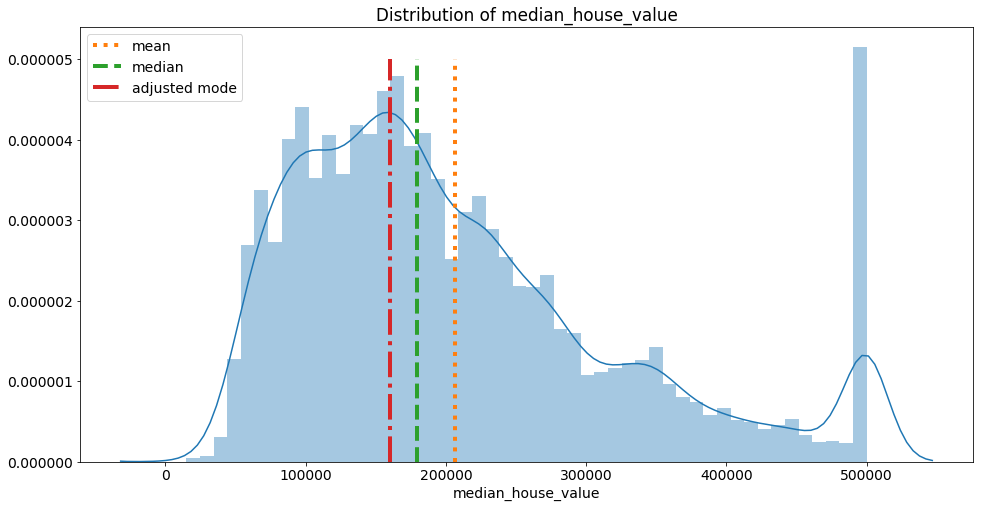

In [20]:
plt.figure(figsize = (16, 8))

sns.distplot(df['median_house_value'], bins = 50) 

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label = 'mean', linestyle = ':', linewidth = 4)
plt.plot([target_median] * 10, y, label = 'median', linestyle = '--', linewidth = 4)
plt.plot([target_adjusted_mode] * 10, y, label = 'adjusted mode', linestyle = '-.', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

# 2. Features Analysis<a class='anchor' id='features'>

### 2.1 Quantitative features<a class='anchor' id='num_features'>

In [21]:
df_num_features = df.select_dtypes(include = ['float64', 'float32', 'float16'])
df_num_features.drop('median_house_value', axis = 1, inplace = True)

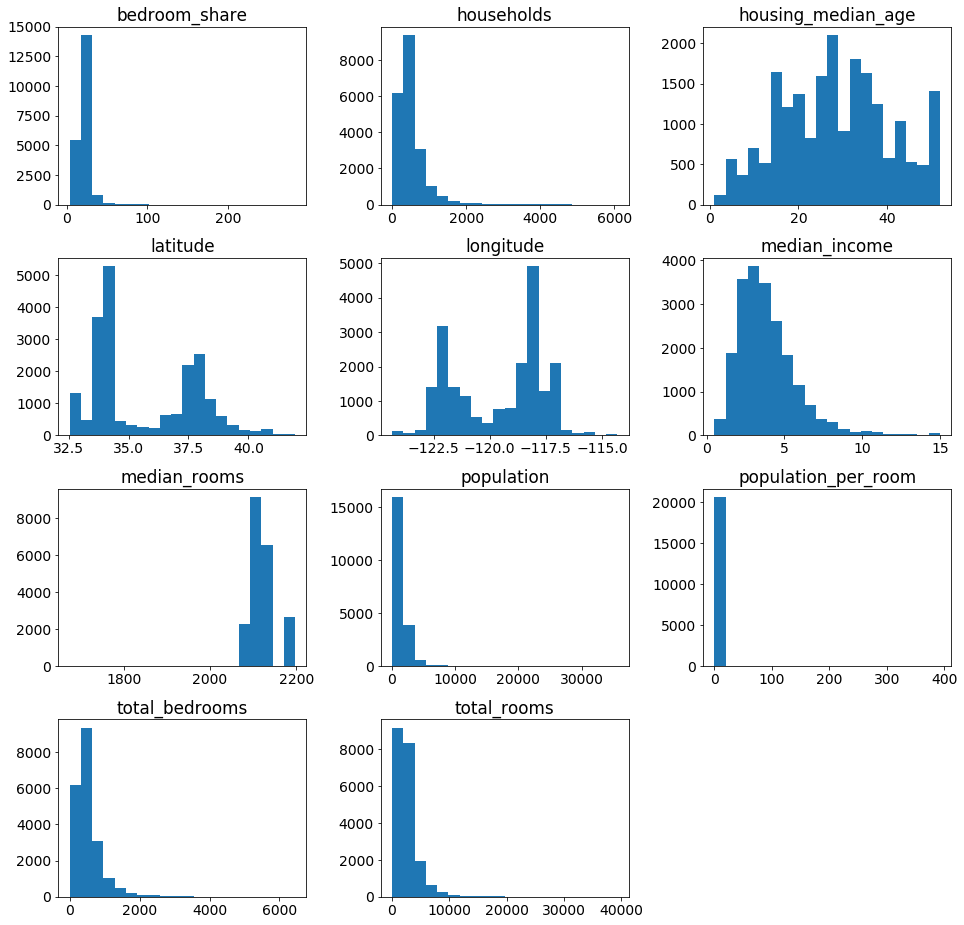

In [22]:
df_num_features.hist(figsize = (16,16), bins = 20, grid = False);

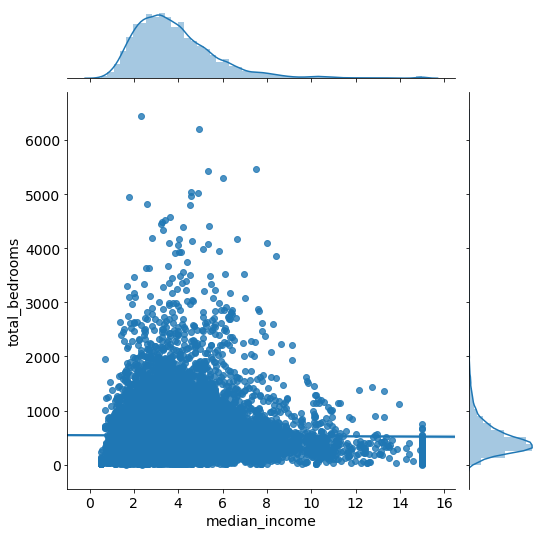

In [23]:
grid = sns.jointplot(df['median_income'], df['total_bedrooms'], kind = 'reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

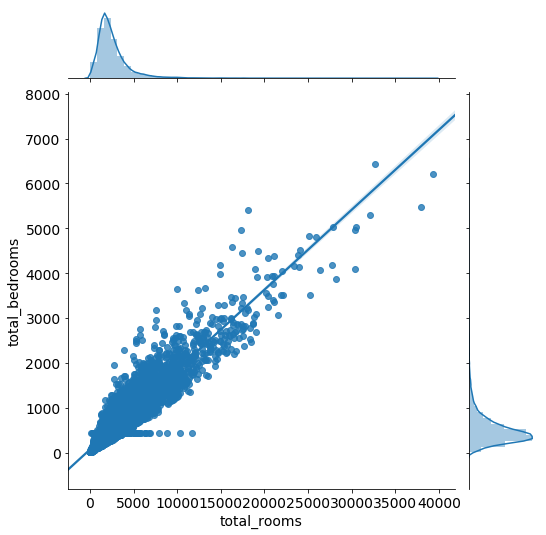

In [24]:
grid = sns.jointplot(df['total_rooms'], df['total_bedrooms'], kind = 'reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [25]:
df['total_bedrooms'].median()

435.0

In [26]:
df[df['total_bedrooms'] == 435].shape[0] * 100 / df.shape[0]

1.182170542635659

In [27]:
df.shape[0]

20640

In [28]:
df[df['total_bedrooms'] == df['total_bedrooms'].median()].shape[0]

244

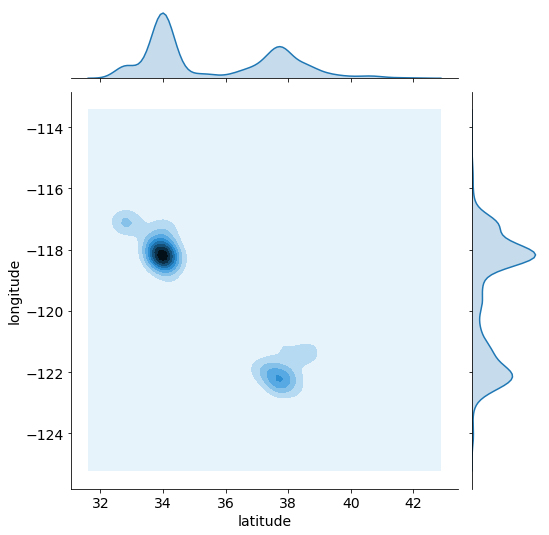

In [29]:
grid = sns.jointplot(df['latitude'], df['longitude'], kind = 'kde')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [30]:
df['city'] = (df['longitude'] > -120) * 1

In [31]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms,city
0,-122.230003,37.880001,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,14.659091,0.365909,0,0,0,1,0,2083.0,0
1,-122.220001,37.860001,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,15.579659,0.338217,0,0,0,1,0,2083.0,0
2,-122.239998,37.849998,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,12.951602,0.338105,0,0,0,1,0,2083.0,0
3,-122.250000,37.849998,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,18.445839,0.437991,0,0,0,1,0,2083.0,0
4,-122.250000,37.849998,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,17.209589,0.347265,0,0,0,1,0,2083.0,0


### 2.2 Categorical features<a class='anchor' id='cat_features'>

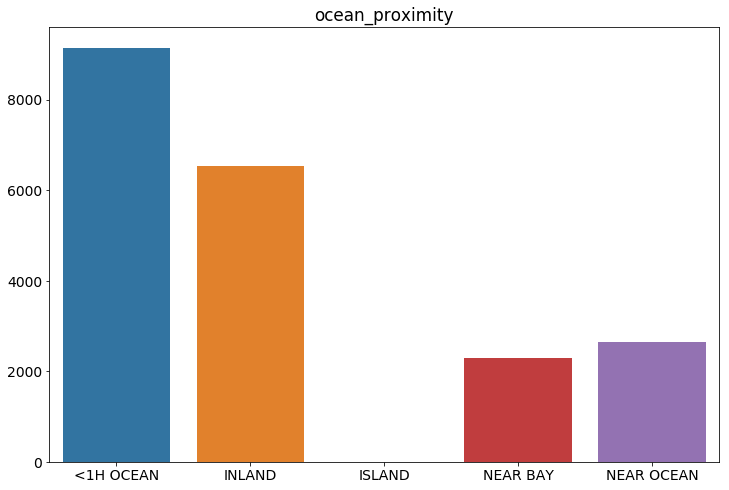

In [32]:
counts = df['ocean_proximity'].value_counts()
    
plt.figure(figsize = (12,8))    
plt.title('ocean_proximity')
sns.barplot(counts.index, counts.values)
    
plt.show()

### 2.3 Binary features<a class='anchor' id='binary_features'>

In [33]:
df_bin_features = df.select_dtypes(include='int64')

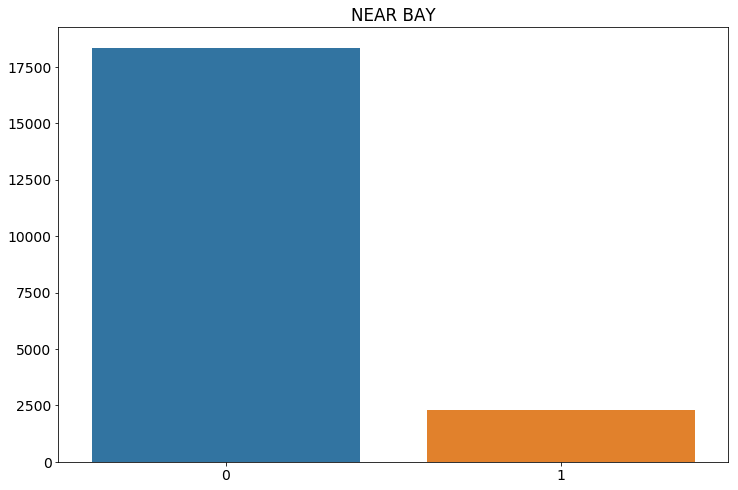

In [34]:
counts = df['NEAR BAY'].value_counts()
    
plt.figure(figsize = (12,8))    
plt.title('NEAR BAY')
sns.barplot(counts.index, counts.values)
    
plt.show()

### 2.4 Correlation Matrix<a class='anchor' id='corr'>

- Shows linear relationship between variables
- Varying from -1 to 1
- Correlation - a measure of only __line__ connection.

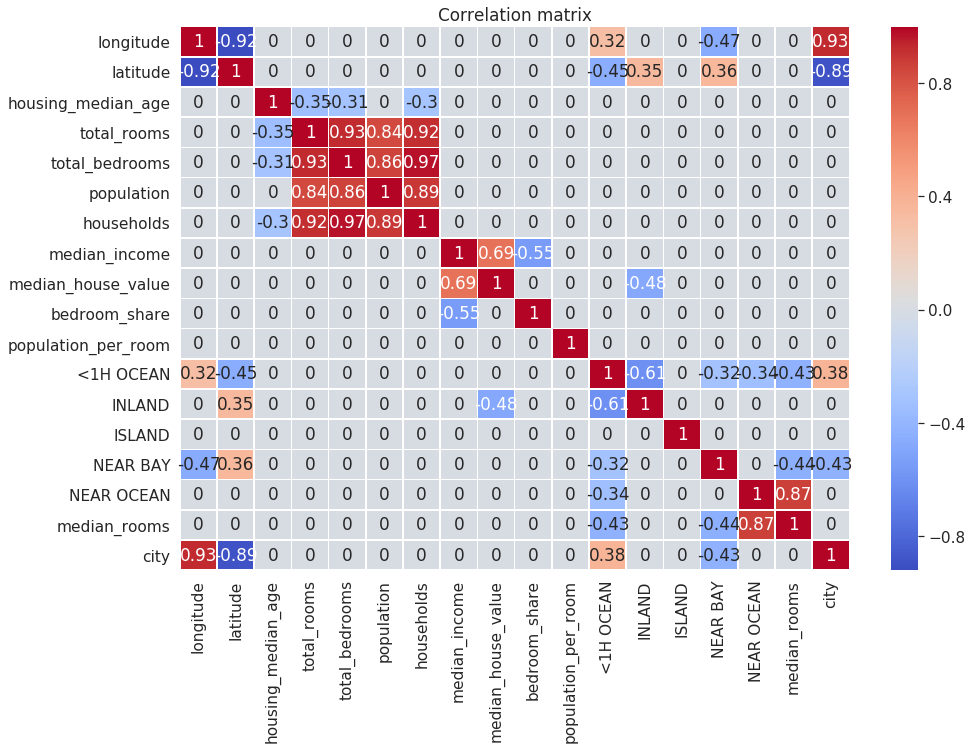

In [35]:
plt.figure(figsize = (15,10))

sns.set(font_scale = 1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths = .5, cmap = 'coolwarm')

plt.title('Correlation matrix')
plt.show()

# 3. Analysis of correlation target from features<a class='anchor' id='target_features'>.

## 3.1 Quantitative features<a class='anchor' id='num_features_target'>

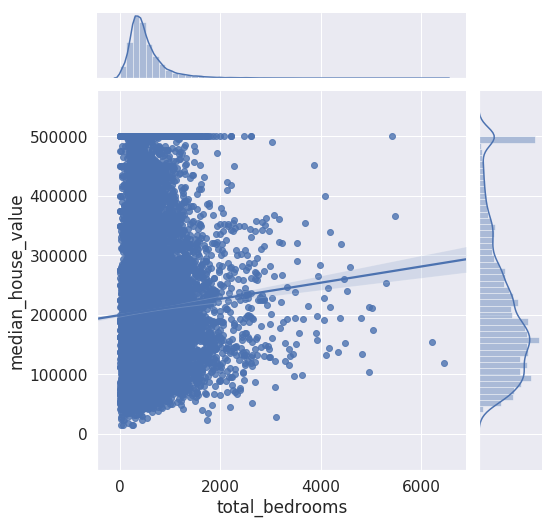

In [36]:
grid = sns.jointplot(df['total_bedrooms'], df['median_house_value'], kind = 'reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [37]:
df['many_bedrooms'] = (df['total_bedrooms'] > 3000) * 1

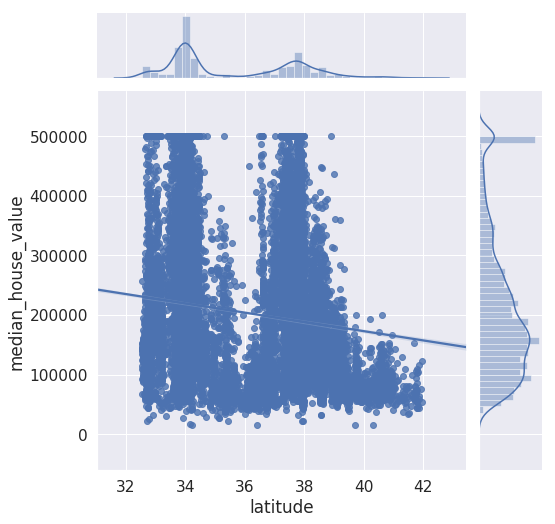

In [38]:
grid = sns.jointplot(df['latitude'], df['median_house_value'], kind = 'reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

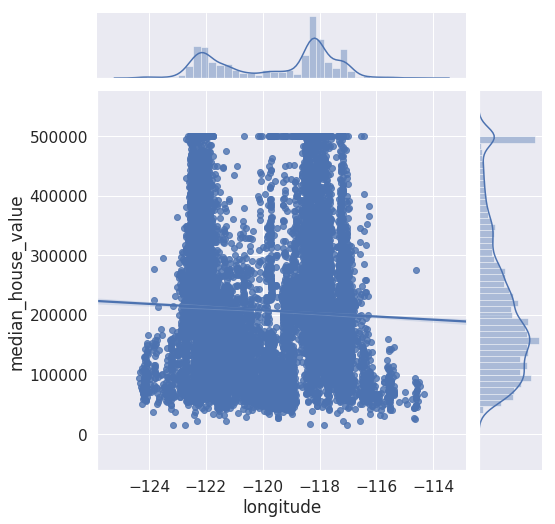

In [39]:
grid = sns.jointplot(df['longitude'], df['median_house_value'], kind = 'reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

## 3.2 Categorical / binary features<a class='anchor' id='cat_bin_features'>

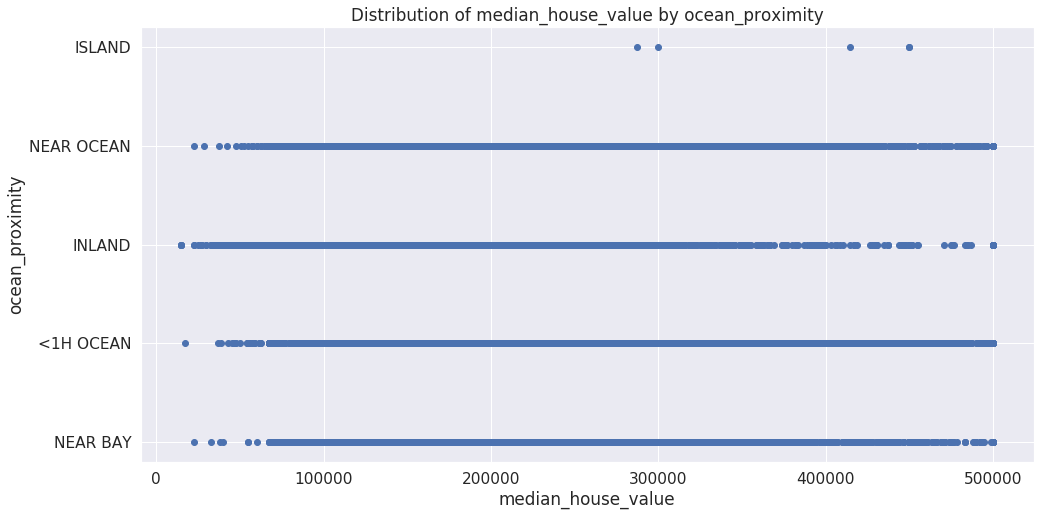

In [40]:
plt.figure(figsize = (16, 8))

plt.scatter(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

### Boxplot

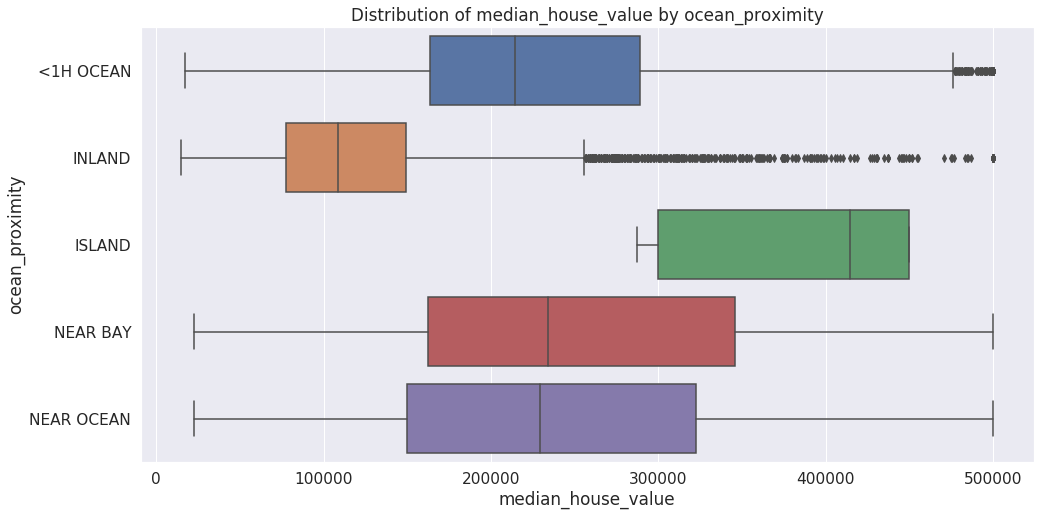

In [41]:
plt.figure(figsize = (16, 8))

sns.boxplot(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

### Violinplot

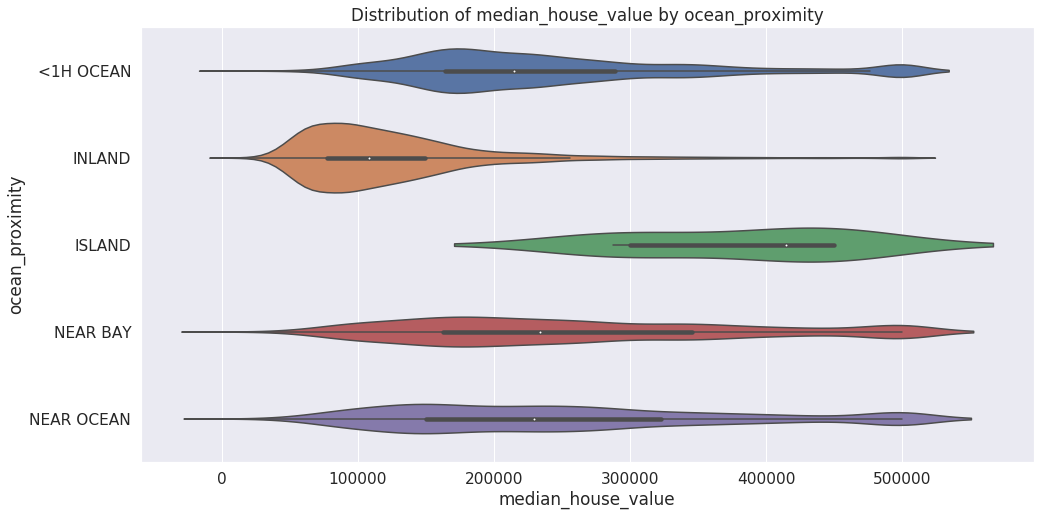

In [42]:
plt.figure(figsize = (16, 8))

sns.violinplot(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

## 3.3 Geodata<a class='anchor' id='geo'>

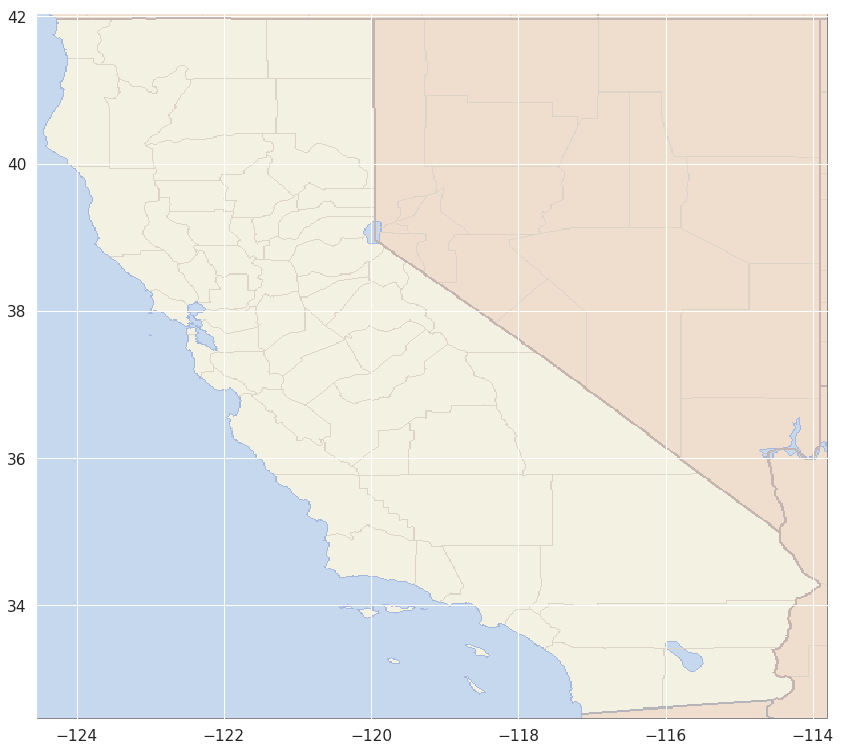

In [44]:
california_map = img.imread(CALIFORNIA_MAP_PATH)

plt.figure(figsize = (20,13))
plt.imshow(california_map, extent = [-124.55, -113.80, 32.45, 42.05], alpha = 0.5)
plt.show()

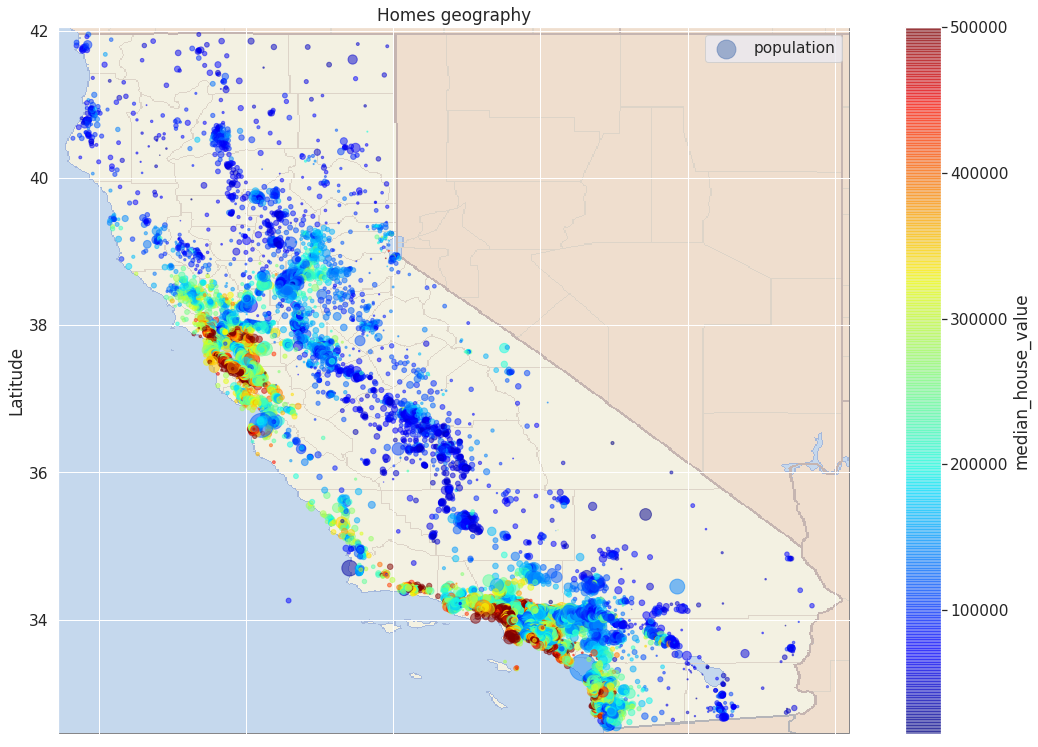

In [45]:
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.5, 
        s = df['population'] / 50, label = 'population', c = 'median_house_value', 
        cmap = plt.get_cmap('jet'), figsize = (20,13))

plt.imshow(california_map, extent = [-124.55, -113.80, 32.45, 42.05], alpha = 0.5)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography")
plt.legend() 
plt.show()

## Kepler

In [47]:
from keplergl import KeplerGl 

map_ = KeplerGl(height = 700)
map_.add_data(df, 'Data')
map_.save_to_html(file_name = './california.html')

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md
Map saved to ./california.html!


In [48]:
df[['latitude', 'longitude', 'median_house_value']].head()

,latitude,longitude,median_house_value
0,37.880001,-122.230003,452600.0
1,37.860001,-122.220001,358500.0
2,37.849998,-122.239998,352100.0
3,37.849998,-122.250000,341300.0
4,37.849998,-122.250000,342200.0


In [49]:
df['latitude'] = np.round(df['latitude'], 0)
df['longitude'] = np.round(df['longitude'], 0)
df[['latitude', 'longitude', 'median_house_value']].head()

,latitude,longitude,median_house_value
0,38.0,-122.0,452600.0
1,38.0,-122.0,358500.0
2,38.0,-122.0,352100.0
3,38.0,-122.0,341300.0
4,38.0,-122.0,342200.0


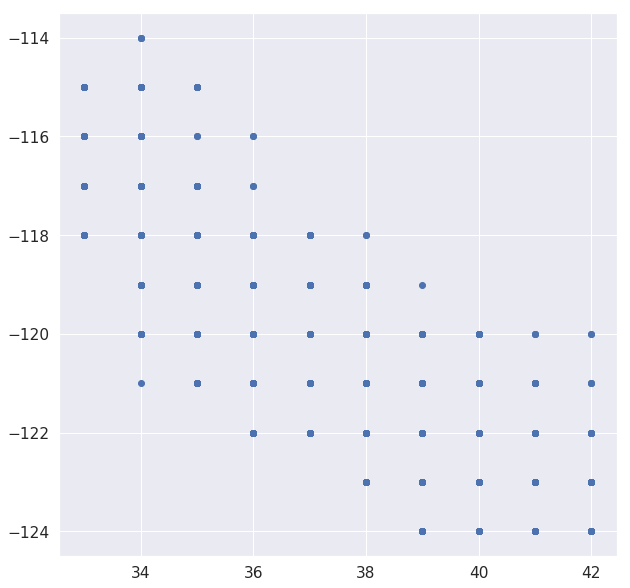

In [50]:
plt.figure(figsize = (10,10))
plt.scatter(df['latitude'], df['longitude'])
plt.show()

In [51]:
df[['latitude', 'longitude']].drop_duplicates().shape[0]

58

In [52]:
df_g = df.groupby(['latitude', 'longitude'])['median_house_value'].mean().reset_index()
df_g.head()

,latitude,longitude,median_house_value
0,33.0,-118.0,328314.812500
1,33.0,-117.0,197055.687500
2,33.0,-116.0,76203.921875
3,33.0,-115.0,74519.234375
4,34.0,-121.0,73100.000000
